In [1]:
import numpy as np
import matplotlib.pyplot as plt
# le début de ce programme est le même que celui script précédent. 


In [2]:
t=8*np.arange(11)
Xmes=np.array([-0.2,2.9,5.4,6.4,5,1.2,-3.4,-6.4,-6.9,-5.7,-3.3])
Ymes=np.array([-8.2,-7.3,-4.9,-1.2,2.9,5.3,4.7,1.5,-2.3,-5.5,-7.5])
x=Xmes*0.46/8.2
y=Ymes*0.46/8.2


In [3]:
vxl=[]
m=np.arange(len(t)-2)
for i in m :
    vx=(x[i+2]-x[i])/(t[i+2]-t[i])
    vxl.append(vx)

vyl=[]
m=np.arange(len(t)-2)
for i in m :
    vy=(y[i+2]-y[i])/(t[i+2]-t[i])
    vyl.append(vy)

axl=[]
m=np.arange(len(t)-4)
for i in m :
    ax=(vxl[i+2]-vxl[i])/(t[i+2]-t[i])
    axl.append(ax)

ayl=[]
m=np.arange(len(t)-4)
for i in m :
    ay=(vyl[i+2]-vyl[i])/(t[i+2]-t[i])
    ayl.append(ay)





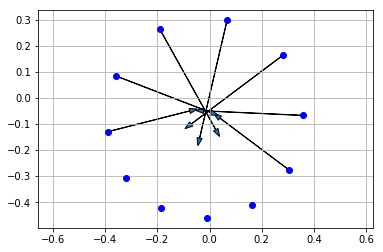

In [4]:
for i in m :
    plt.arrow(x[i+2],y[i+2],200*axl[i],200*ayl[i],head_width=0.02)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.axis('equal')
plt.grid()
plt.plot(x,y,'bo')

la masse du soleil est de l ordre de 1.7e+30 kg


Text(0,0.5,'valeur du produit GMs x10^20')

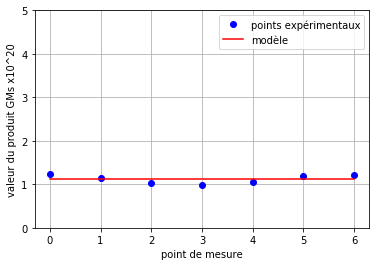

In [5]:
ayln=1.5*10**11*np.array(ayl)/(24*3600)**2 # on convertit les échelles de distance et de temps en unités SI
axln=1.5*10**11*np.array(axl)/(24*3600)**2 # idem
norma=(ayln**2+axln**2)**(1/2) # on calcule la norme de l'accélération
dx=x[:-2]*1.5*10**11 # on enlève les deux dernières valeurs de dx
dy=y[:-2]*1.5*10**11 #idem pour uy
d=(dx**2+dy**2)**(1/2) # on calcule la distance pour les listes coupées

dr=d[2:] # on enlève les deux premières valeurs
GM=dr**2*norma # on calcule la valeur du produit GM
GMth=6.67*10**(-11)*2*10**30 # valeur tabulée de GM
n=np.arange(len(t)-4) 
plt.plot(n,GM*10**(-20),'bo',label="points expérimentaux")
plt.legend()
plt.grid()

mod=np.polyfit(n,GM,0) # on modélise la liste des valeurs de GM par une constante (polynôme d'ordre 0) 
M=float(mod[0]/(6.67*10**(-11))) # on calcule la masse du soleil
print('la masse du soleil est de l ordre de',"%.1e"%M,'kg') # la commande "%.1e"%M sert à ne garder qu'1 seul CS pour M 
GMmod=0*n+mod[0] # on définit une fonction à partir de la valeur modélisée, pour pouvoir tracer. 
plt.plot(n,(GMmod)*10**(-20),'r-',label="modèle")
plt.legend()
plt.ylim(0,5)
plt.xlabel("point de mesure")
plt.ylabel("valeur du produit GMs x10^20")


Text(0,0.5,'accélération')

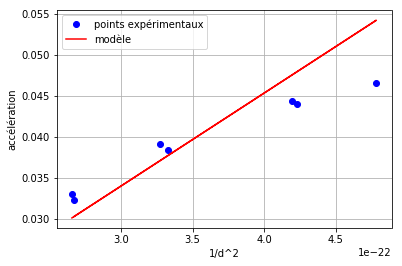

In [6]:
drci=1/(dr)**2 #on définit l'inverse du carré de la distance
plt.plot(drci,norma,'bo',label="points expérimentaux") # on fait tracer l'accélération en fonction de cet inverse. 
plt.legend()
plt.grid()
model=6.67*10**(-11)*1.7*10**30*drci # on définit une fonction modèle de la précédente
plt.plot(drci,model,'r-',label="modèle")
plt.legend()
plt.xlabel("1/d^2")
plt.ylabel("accélération")
